## Albedo, greenhouse gases, and planets' surface temperature

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Surface temperature and equilibrium temperature (or average T at outgoing long wave radiation occurs)
#T_s=(P_s/P_rad)**(R/Cp)*T_rad
#T_rad=(P_rad/P_s)**(R/Cp)*Ts

In [27]:
sigma=5.67e-8
R=287.
Cp=1004.

Text(0, 0.5, 'Flux (W/m2)')

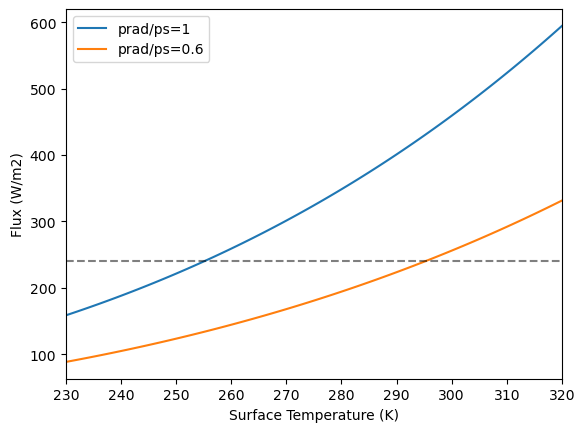

In [28]:
ts=np.arange(230,321,1.)

## Case 1 P_rad/P_s=1.
P_rad1=1000.
P_s=1000.
T_rad1=(P_rad1/P_s)**(R/Cp)*ts
Flux1=sigma*T_rad1**4

## Case 1 P_rad/P_s=.6
P_rad2=600.

T_rad2=(P_rad2/P_s)**(R/Cp)*ts
Flux2=sigma*T_rad2**4

plt.plot(ts,Flux1, label='prad/ps=1')
plt.plot(ts,Flux2, label='prad/ps=0.6')
plt.xlim(230,320)
plt.plot([230,320],[240,240],'k--', alpha=0.5)
plt.legend()
plt.xlabel('Surface Temperature (K)')
plt.ylabel('Flux (W/m2)')

In [29]:
alpha_ice = .6
alpha_0 = .2
T1 = 260.
T2 = 290.

In [30]:
def albedo(T):
    if T < T1:
        return alpha_ice
    elif (T >= T1)&(T<=T2):
        r = (T-T2)**2/(T2-T1)**2
        return alpha_0 + (alpha_ice - alpha_0)*r
    else:
        return alpha_0

Text(0, 0.5, 'Albedo')

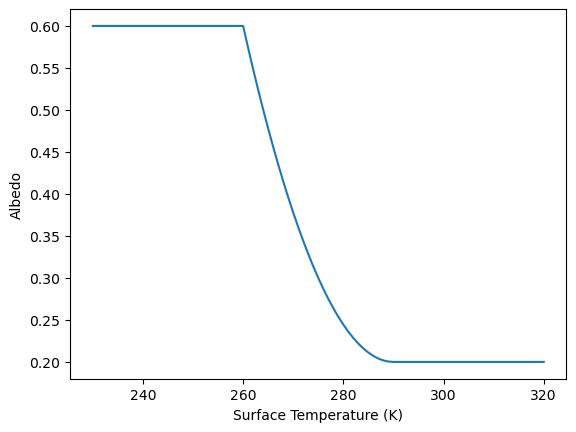

In [32]:
## Plot albedo

A=[]
for t1 in ts:
    a1=albedo(t1)
    A.append(a1)
plt.plot(ts,A) 
plt.xlabel('Surface Temperature (K)')
plt.ylabel('Albedo')

### Albedo, radiating pressure (or greenhouse gas concentration), and surface temperature

In [33]:
## Starting from a relatively opaque climate
P_rad_o=np.arange(350,750.1,.1)
S0=960.

T_rad_o=[]
T_s_o=[]
A_o=[]
a_i=alpha_0
niter=10

for i in range(len(P_rad_o)):
    t_rad=((1.-a_i)*S0/4./sigma)**0.25
    t_s=(P_s/P_rad_o[i])**(R/Cp)*t_rad
    a_f=albedo(t_s)
  
    for j in range(niter):
        while (abs(a_f-a_i) >  1.e-10):
            a_i=a_f
            t_rad=((1.-a_i)*S0/4./sigma)**0.25
    
            t_s=(P_s/P_rad_o[i])**(R/Cp)*t_rad
           
            a_f=albedo(t_s)
            
        else:
            break

    T_rad_o.append(t_rad)
    T_s_o.append(t_s)
    A_o.append(a_f)


Text(0, 0.5, 'Surface Temperature (K)')

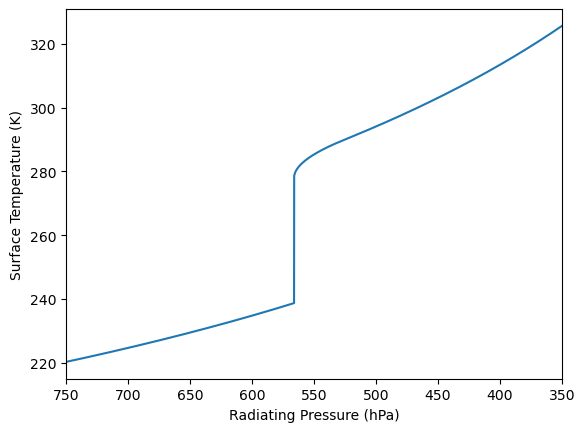

In [35]:
plt.plot(P_rad_o,T_s_o)
plt.xlim(750,350)
plt.xlabel('Radiating Pressure (hPa)')
plt.ylabel('Surface Temperature (K)')

In [23]:
## Starting from a relatively transparent climate
P_rad_t=np.arange(750,349.9,-.1)

T_rad_t=[]
T_s_t=[]
A_t=[]
a_i=alpha_ice
niter=10

for i in range(len(P_rad_t)):
    t_rad=((1.-a_i)*S0/4./sigma)**0.25
    t_s=(P_s/P_rad_t[i])**(R/Cp)*t_rad
    a_f=albedo(t_s)
  
    for j in range(niter):
        while (abs(a_f-a_i) >  1.e-10):
            a_i=a_f
            t_rad=((1.-a_i)*S0/4./sigma)**0.25
    
            t_s=(P_s/P_rad_t[i])**(R/Cp)*t_rad
           
            a_f=albedo(t_s)
            
        else:
            break

    T_rad_t.append(t_rad)
    T_s_t.append(t_s)
    A_t.append(a_f)


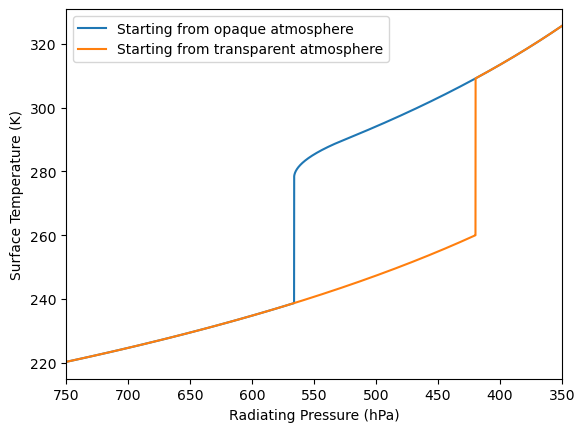

In [37]:
plt.plot(P_rad_o,T_s_o, label='Starting from opaque atmosphere')
plt.plot(P_rad_t,T_s_t, label='Starting from transparent atmosphere')
plt.xlim(750,350)
plt.xlabel('Radiating Pressure (hPa)')
plt.ylabel('Surface Temperature (K)')
plt.legend()